In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
import warnings
warnings.filterwarnings('ignore')

In [53]:
train_data=pd.read_csv('termdeposit_train.csv')
test_data=pd.read_csv('termdeposit_test.csv')

In [54]:
train_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [55]:
train_data.drop(columns=['ID'],axis=1,inplace=True)

In [56]:
train_data=train_data.drop_duplicates()

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.3+ MB


In [58]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [59]:
train_data.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [60]:
job = train_data['job'].value_counts().reset_index()
job

,index,job
0,blue-collar,6842
1,management,6639
2,technician,5307
3,admin.,3631
4,services,2903
5,retired,1574
6,self-employed,1123
7,entrepreneur,1008
8,unemployed,905
9,housemaid,874


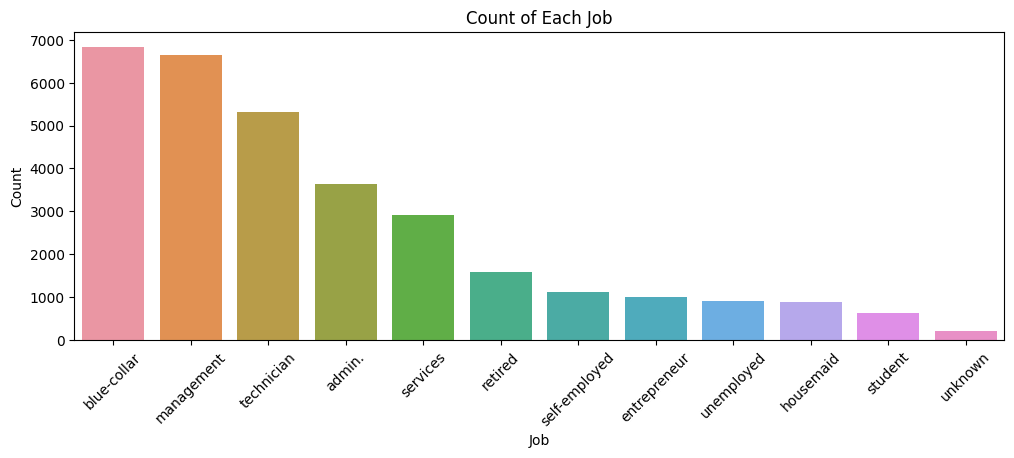

In [68]:
plt.figure(figsize=(12, 4))
sns.barplot(x='index', y='job', data=job)
plt.title('Count of Each Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [64]:
marital = train_data['marital'].value_counts().reset_index()
marital


,index,marital
0,married,19095
1,single,8922
2,divorced,3630


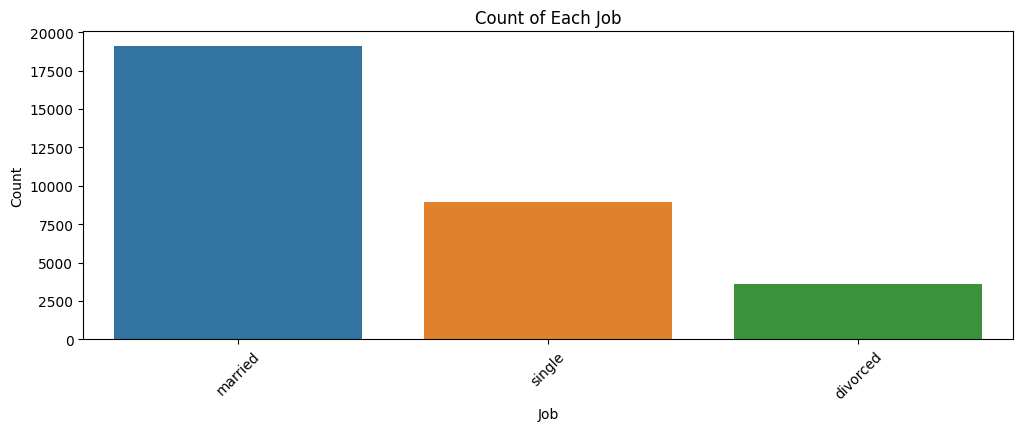

In [69]:
plt.figure(figsize=(12, 4))
sns.barplot(x='index', y='marital', data=marital)
plt.title('Count of Each Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

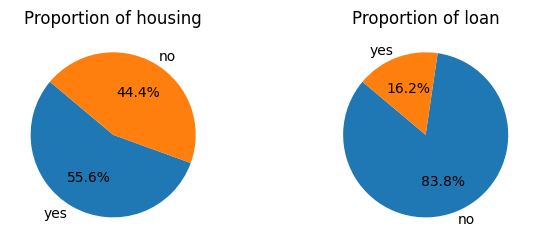

In [70]:
list1 = ['housing','loan']

for i, variable in enumerate(list1, start=1):
    plt.subplot(2, 2, i)
    train_data[variable].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title('Proportion of ' + variable)
    plt.ylabel('')

plt.tight_layout()  
plt.show()

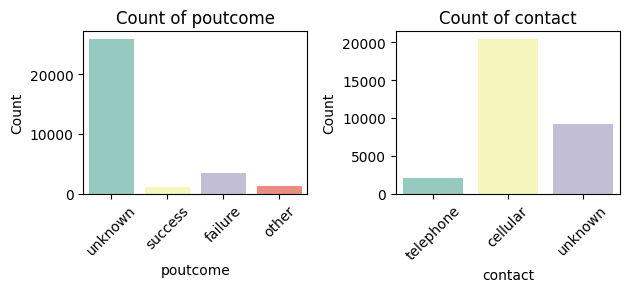

In [71]:
list2 = ['poutcome','contact']


for i, variable in enumerate(list2, start=1):
    plt.subplot(2, 2, i)
    sns.countplot(x=variable, data=train_data, palette="Set3")
    plt.title('Count of ' + variable)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

<Axes: >

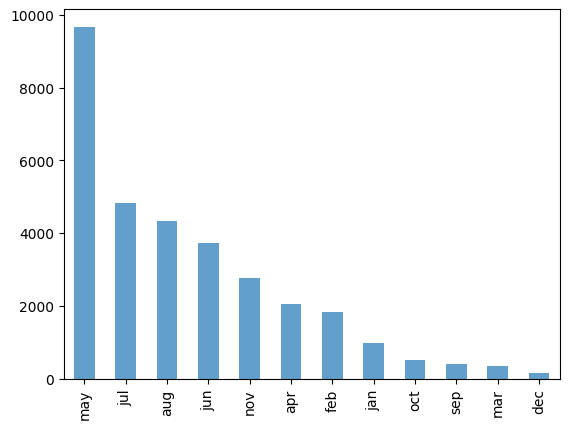

In [72]:
train_data['month'].value_counts().plot(kind='bar', alpha=0.7)


## Preprocessing Data

In [74]:
train_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [75]:
train_data.drop(columns = ['default','poutcome','previous','pdays'],inplace=True)

In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['job'] = label_encoder.fit_transform(train_data['job'])
train_data['marital'] = label_encoder.fit_transform(train_data['marital'])
train_data['education'] = label_encoder.fit_transform(train_data['education'])
train_data['housing'] = label_encoder.fit_transform(train_data['housing'])
train_data['loan'] = label_encoder.fit_transform(train_data['loan'])
train_data['month'] = label_encoder.fit_transform(train_data['month'])
train_data['contact'] = label_encoder.fit_transform(train_data['contact'])
train_data['subscribed'] = label_encoder.fit_transform(train_data['subscribed'])

## Taining a Model

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluation_fn(best_model, X_test, Y_test):
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print('Accuracy of the model is:', accuracy)
    print('Precision of the model is:', precision)
    print('Recall of the model is:', recall)
    print('F1 score of the model is:', f1)


In [83]:
X = train_data.drop('subscribed', axis = 1)
y = train_data['subscribed']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

In [84]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, Y_train)

evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.8642969984202211
Precision of the model is: 0.863457999648794
Recall of the model is: 0.8642969984202211
F1 score of the model is: 0.863873951889283


In [85]:
model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, Y_train)

evaluation_fn(model_rf,X_test,Y_test)

Accuracy of the model is: 0.8925750394944708
Precision of the model is: 0.8755749996598483
Recall of the model is: 0.8925750394944708
F1 score of the model is: 0.8784436172908235


In [86]:
model_xg = XGBRFClassifier(random_state=42)

model_xg.fit(X_train, Y_train)

evaluation_fn(model_xg,X_test,Y_test)

[12:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the model is: 0.8919431279620853
Precision of the model is: 0.8730186983557428
Recall of the model is: 0.8919431279620853
F1 score of the model is: 0.8741554665695849


In [90]:
# Random Forest Classifier with hyperparameter tuning
rf_model = XGBRFClassifier(random_state=17,tree_method='gpu_hist')
param_grid_rf = {
    'n_estimators': [60,80,100, 120,150],
    'max_depth': [6,7,8,10,12],
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='f1')
grid_search_rf.fit(X_train, Y_train)
best_rf_model = grid_search_rf.best_estimator_
print("Random Forest Classifier:")
evaluation_fn(best_rf_model, X_test, Y_test)

[12:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:44:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:44:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:44:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [91]:
params=best_rf_model.get_params()

In [95]:
# Built-in feature importance (Gini Importance)
importances = best_rf_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

      Feature  Gini Importance
10   duration         0.216478
7     contact         0.173242
9       month         0.135884
5     housing         0.131128
6        loan         0.075360
0         age         0.052851
8         day         0.045994
4     balance         0.041962
11   campaign         0.036649
2     marital         0.034956
1         job         0.029248
3   education         0.026249


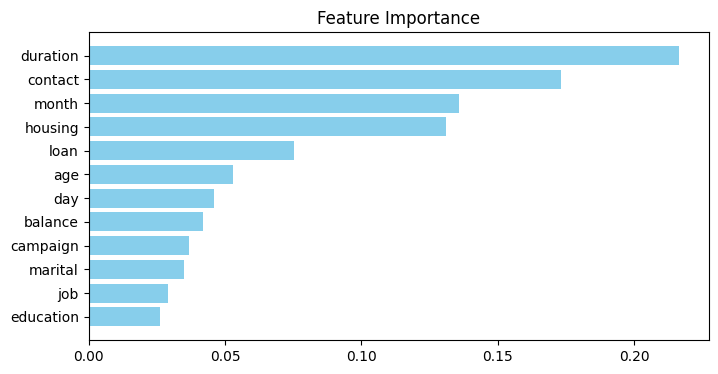

In [96]:
# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Gini Importance'], color='skyblue')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()

In [99]:
# Random Forest Classifier with hyperparameter tuning
xg_model = XGBRFClassifier(**params)

xg_model.fit(X_train, Y_train)
print("Random Forest Classifier:")
evaluation_fn(xg_model, X_test, Y_test)

[14:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Random Forest Classifier:
Accuracy of the model is: 0.8957345971563981
Precision of the model is: 0.8818229397831857
Recall of the model is: 0.8957345971563981
F1 score of the model is: 0.8850940350475013


## Predicting on test dataset

In [110]:
feature_names = xg_model.get_booster().feature_names
test_data=test_data[feature_names]
feature_names

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign']

In [111]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test_data['job'] = label_encoder.fit_transform(test_data['job'])
test_data['marital'] = label_encoder.fit_transform(test_data['marital'])
test_data['education'] = label_encoder.fit_transform(test_data['education'])
test_data['housing'] = label_encoder.fit_transform(test_data['housing'])
test_data['loan'] = label_encoder.fit_transform(test_data['loan'])
test_data['month'] = label_encoder.fit_transform(test_data['month'])
test_data['contact'] = label_encoder.fit_transform(test_data['contact'])


In [113]:
predictions=xg_model.predict(test_data)

In [117]:
pd.Series(predictions).value_counts()


0    12537
1     1027
dtype: int64